# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

# Step 1

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
# Downloading the data
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Step 2: Quick exploratory data analysis

**Dictionary**

Age (numerical)

Job: Type of Job (categorical)

Marital: Marital status (categorical)

Education: (categorical)

Default: Has credit in default? (categorical)

Housing: Has housing loan? (categorical)

Loan: Has personal loan? (categorical)

Contact: Contact communication type (categorcial)

Month: Last contact month of year (categorical)

Day_of_week: Last contact day of the week (categorical)

Duration: Last contact duration, in seconds (numerical)

**Important note:** *This output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.* 

Campaign: Number of contacts performed during this campaign and for this client (numerical)

pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: Number of contacts performed before this campaign and for this client (numerical)

poutcome: Outcome of the previous marketing campaign (categorical)

Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.

emp.var.rate: Employment variation rate - quarterly indicator (numeric)

cons.price.idx: Consumer price index- monthly indicator (numeric)

cons.conf.idx: Consumer confidence index - monthly indicator (numeric)

euribor3m: Euribor 3 month rate: - daily indicator(numeric)

nr.employed: Number of employees - quarterly indicator (numeric)

**Target variable:**
y: has the client subscribed a term deposit?

In [3]:
# Shape
print("The data set has ",df_raw.shape[0], " rows and ",df_raw.shape[1]," columns." )

The data set has  41188  rows and  21  columns.


In [4]:
# Info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We observe there is no nan values and the size of the data set is 41188  rows and  21  columns.

### What categories are in each feature?

In [5]:
print("The amount of categorical columns is: ", len(df_raw.select_dtypes(include="O").columns))

The amount of categorical columns is:  11


In [6]:
# The categorical features are: 
df_raw.select_dtypes(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### Descriptive Statistics

In [7]:
round(df_raw.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.0,3.0,962.0,0.0,0.0,94.0,-41.0,4.0,5167.0
std,10.0,259.0,3.0,187.0,0.0,2.0,1.0,5.0,2.0,72.0
min,17.0,0.0,1.0,0.0,0.0,-3.0,92.0,-51.0,1.0,4964.0
25%,32.0,102.0,1.0,999.0,0.0,-2.0,93.0,-43.0,1.0,5099.0
50%,38.0,180.0,2.0,999.0,0.0,1.0,94.0,-42.0,5.0,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.0,94.0,-36.0,5.0,5228.0
max,98.0,4918.0,56.0,999.0,7.0,1.0,95.0,-27.0,5.0,5228.0


In [8]:
df_raw.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### There is some duplicated data?

In [9]:
df_raw.duplicated().any()

True

In [10]:
len(df_raw[df_raw.duplicated() == True])

12

### Unique values

In [11]:
# Amount of unique values per column
df_raw.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

### The target value is balance?

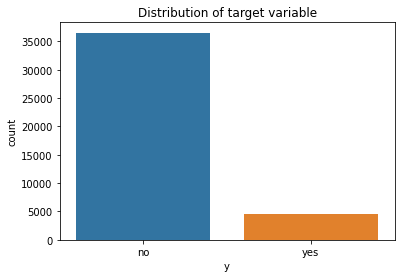

In [12]:
# Distribution of traget variable

sns.countplot(x=df_raw['y'], data=df_raw)
plt.title('Distribution of target variable')
plt.show()

The target variable is inbalaced

## Cleaning process

In [13]:
df=df_raw.copy()

### Duplicated data

In [14]:
# We remove the duplicated data
df = df[df.duplicated() == False]

In [15]:
#Unique values in categorical columns
for col  in df.select_dtypes(include="O").columns:
    print("Unique values in: ",col)
    print(df[col].unique())
    

Unique values in:  job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in:  marital
['married' 'single' 'divorced' 'unknown']
Unique values in:  education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values in:  default
['no' 'unknown' 'yes']
Unique values in:  housing
['no' 'yes' 'unknown']
Unique values in:  loan
['no' 'yes' 'unknown']
Unique values in:  contact
['telephone' 'cellular']
Unique values in:  month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in:  day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in:  poutcome
['nonexistent' 'failure' 'success']
Unique values in:  y
['no' 'yes']


### Unknown values

Looking for unique values, we observe that some columns has the value unknown, in the following lines we going to change those values.

In [16]:
# We replace the unknown values with the most frequent value
for col  in df.select_dtypes(include="O").columns:
    df[col] = np.where((df[col]=='unknown') , df[col].mode(), df[col])

In [17]:
for col  in df.select_dtypes(include="O").columns:
  print("Unique values in: ",col)
  print(df[col].unique())

Unique values in:  job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
Unique values in:  marital
['married' 'single' 'divorced']
Unique values in:  education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
Unique values in:  default
['no' 'yes']
Unique values in:  housing
['no' 'yes']
Unique values in:  loan
['no' 'yes']
Unique values in:  contact
['telephone' 'cellular']
Unique values in:  month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in:  day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in:  poutcome
['nonexistent' 'failure' 'success']
Unique values in:  y
['no' 'yes']


### Outliers

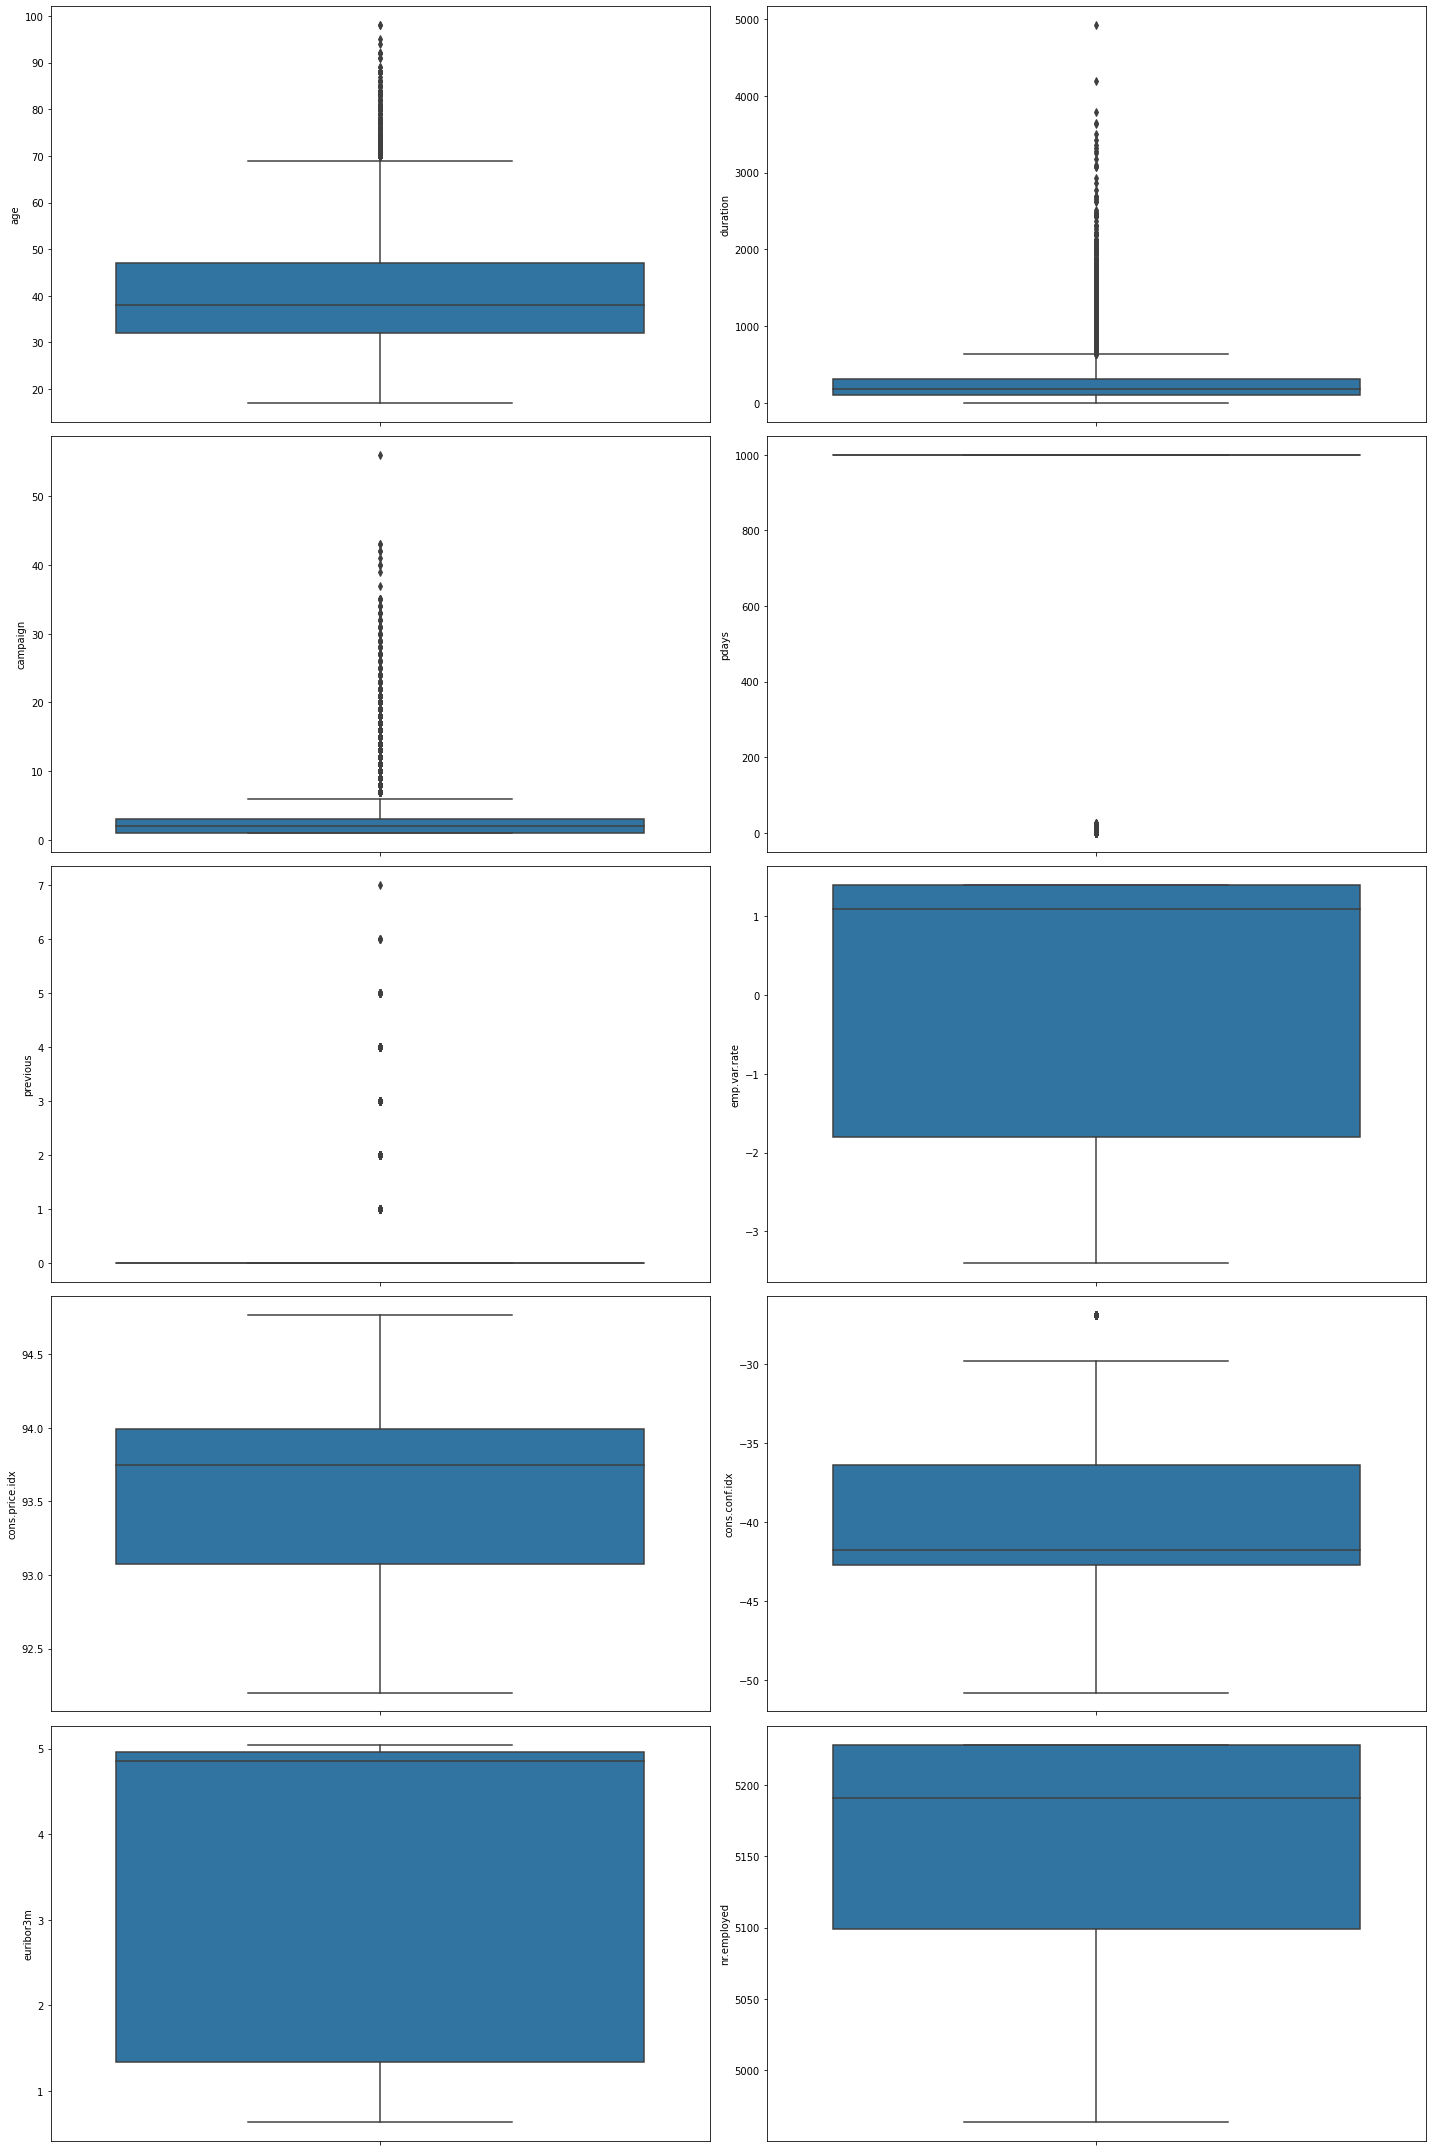

In [18]:
#Box plots for the numerical columns
f, ax = plt.subplots(5,2, figsize=(20,30))
sns.color_palette("deep")

sns.boxplot(y = df['age'], ax=ax[0,0]) 
sns.boxplot(y = df['duration'], ax=ax[0,1])
sns.boxplot(y = df['campaign'], ax=ax[1,0])
sns.boxplot(y = df['pdays'], ax=ax[1,1])
sns.boxplot(y = df['previous'], ax=ax[2,0])
sns.boxplot(y = df['emp.var.rate'], ax=ax[2,1])
sns.boxplot(y = df['cons.price.idx'], ax=ax[3,0])
sns.boxplot(y = df['cons.conf.idx'], ax=ax[3,1])
sns.boxplot(y = df['euribor3m'], ax=ax[4,0])
sns.boxplot(y = df['nr.employed'], ax=ax[4,1])

plt.tight_layout()

plt.draw()

We see outliers in age, duration, campaign, previous and in cons.conf.idx

In [19]:
# Using the IQR method function
def iqr_calc(col_name):
  stat = df[f'{col_name}'].describe()
  print(stat)
  IQR = stat['75%']-stat['25%']
  upper = stat['75%'] + 1.5*IQR
  lower = stat['25%'] - 1.5*IQR
  rows_out= df[df[f'{col_name}'] > upper].count()
  return f'In the {col_name} case the upper & lower for bounds for suspected outliers are {upper} and {lower}. Total of row off upper bound \n{rows_out}'

In [20]:
print(iqr_calc('age'))

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
In the age case the upper & lower for bounds for suspected outliers are 69.5 and 9.5. Total of row off upper bound 
age               468
job               468
marital           468
education         468
default           468
housing           468
loan              468
contact           468
month             468
day_of_week       468
duration          468
campaign          468
pdays             468
previous          468
poutcome          468
emp.var.rate      468
cons.price.idx    468
cons.conf.idx     468
euribor3m         468
nr.employed       468
y                 468
dtype: int64


In [21]:
# Remove the outliers for age
df=df.drop(df[df['age'] > 69.5].index)

In [22]:
print(iqr_calc('duration'))

count    40708.000000
mean       258.135207
std        259.607003
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
In the duration case the upper & lower for bounds for suspected outliers are 644.5 and -223.5. Total of row off upper bound 
age               2935
job               2935
marital           2935
education         2935
default           2935
housing           2935
loan              2935
contact           2935
month             2935
day_of_week       2935
duration          2935
campaign          2935
pdays             2935
previous          2935
poutcome          2935
emp.var.rate      2935
cons.price.idx    2935
cons.conf.idx     2935
euribor3m         2935
nr.employed       2935
y                 2935
dtype: int64


In [23]:
# Remove the outliers for duration
df=df.drop(df[df['duration'] > 644.5].index)

In [24]:
print(iqr_calc('campaign'))

count    37773.000000
mean         2.583194
std          2.820224
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
In the campaign case the upper & lower for bounds for suspected outliers are 6.0 and -2.0. Total of row off upper bound 
age               2249
job               2249
marital           2249
education         2249
default           2249
housing           2249
loan              2249
contact           2249
month             2249
day_of_week       2249
duration          2249
campaign          2249
pdays             2249
previous          2249
poutcome          2249
emp.var.rate      2249
cons.price.idx    2249
cons.conf.idx     2249
euribor3m         2249
nr.employed       2249
y                 2249
dtype: int64


In [25]:
# Remove the outliers for campaign
df=df.drop(df[df['campaign'] > 6.0].index)

In [26]:
print(iqr_calc('previous'))

count    35524.000000
mean         0.175008
std          0.493375
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
In the previous case the upper & lower for bounds for suspected outliers are 0.0 and 0.0. Total of row off upper bound 
age               4962
job               4962
marital           4962
education         4962
default           4962
housing           4962
loan              4962
contact           4962
month             4962
day_of_week       4962
duration          4962
campaign          4962
pdays             4962
previous          4962
poutcome          4962
emp.var.rate      4962
cons.price.idx    4962
cons.conf.idx     4962
euribor3m         4962
nr.employed       4962
y                 4962
dtype: int64


In [27]:
print(iqr_calc('cons.conf.idx'))

count    35524.000000
mean       -40.523094
std          4.623744
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64
In the cons.conf.idx case the upper & lower for bounds for suspected outliers are -26.949999999999992 and -52.150000000000006. Total of row off upper bound 
age               359
job               359
marital           359
education         359
default           359
housing           359
loan              359
contact           359
month             359
day_of_week       359
duration          359
campaign          359
pdays             359
previous          359
poutcome          359
emp.var.rate      359
cons.price.idx    359
cons.conf.idx     359
euribor3m         359
nr.employed       359
y                 359
dtype: int64


In [28]:
# Remove the outliers for cons.conf.idx
df=df.drop(df[df['cons.conf.idx'] > -26.949999999999992].index)

### Removing irrelevant data

In [29]:
df.drop(['marital', 'contact', 'month','day_of_week'],axis=1, inplace=True)

### Convertion of some data

In [30]:
# Converting age into categorical data by creating age-groups of ten years.
df['age_group'] = pd.cut(x=df['age'], bins=[10,20,30,40,50,60,70,80,90,100])

In [31]:
# Remove old age column
df.drop(['age'], axis=1, inplace=True)

In [32]:
# Inserting categories 'basic.9y','basic.6y','basic4y' into 'middle_school'
df['education'] = df['education'].replace({'basic.9y': 'middle_school', 'basic.6y': 'middle_school', 'basic.4y': 'middle_school'})

In [33]:
# Converting target variable into binary
df['y'] = df['y'].map({'no': 0, 'yes':1})
df['y'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Encoding categorical features

In [34]:
# Nominal variables
df = pd.get_dummies(df,columns=['job', 'poutcome', 'age_group'], dtype='int64')

In [35]:
# Ordinal variables
df['education']=df['education'].map({'illiterate': 0, 'middle_school':1, 'high.school':2, 'professional.course':3,'university.degree':4})
df['education'].head(5)

0    1
1    2
2    2
3    1
4    2
Name: education, dtype: int64

In [36]:
# Binary variables
df['default'] = df['default'].map({'no': 0, 'yes':1})
df['housing'] = df['housing'].map({'no': 0, 'yes':1})
df['loan'] = df['loan'].map({'no': 0, 'yes':1})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35165 entries, 0 to 41186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             35165 non-null  int64  
 1   default               35165 non-null  int64  
 2   housing               35165 non-null  int64  
 3   loan                  35165 non-null  int64  
 4   duration              35165 non-null  int64  
 5   campaign              35165 non-null  int64  
 6   pdays                 35165 non-null  int64  
 7   previous              35165 non-null  int64  
 8   emp.var.rate          35165 non-null  float64
 9   cons.price.idx        35165 non-null  float64
 10  cons.conf.idx         35165 non-null  float64
 11  euribor3m             35165 non-null  float64
 12  nr.employed           35165 non-null  float64
 13  y                     35165 non-null  int64  
 14  job_admin.            35165 non-null  int64  
 15  job_blue-collar    

# Step 4

In [38]:
# Separating the target variable (y) from the predictors(X)
X=df.drop(['y'],axis=1) 
y=df['y'] 

### Balancing the target variable

In [39]:
# We use random Over-Sampling to add more copies to the minority class
os =  RandomOverSampler()
X_new,y_new=os.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


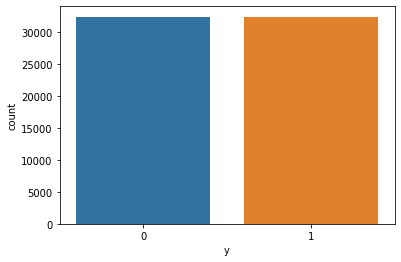

In [40]:
sns.countplot(y_new)

### Train Test Split 

We splitting the data into training and testing.

In [41]:
# Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(28132, 36) (7033, 36) (28132,) (7033,)


In [44]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Building a Logistic Regression model with default hyperparameters.
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[[6375  146]
 [ 317  195]]


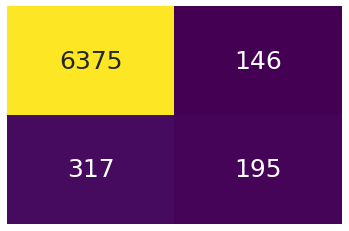

In [47]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True, annot_kws={"size": 25}, fmt="d", xticklabels=False, yticklabels=False, cmap="viridis", cbar=False)

In [48]:
accuracy_score(y_pred, y_test)

0.934167496089862

In [49]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      6692
           1       0.38      0.57      0.46       341

    accuracy                           0.93      7033
   macro avg       0.68      0.76      0.71      7033
weighted avg       0.95      0.93      0.94      7033



### Hypertune the model to improve the results.

In [50]:
# Models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.1, 1, 10, 100, 1000]

# Defining grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.937305 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.937030 (0.002790) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936973 (0.002314) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.937258 (0.002499) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.936926 (0.002669) with: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936831 (0.002033) with: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.937182 (0.002431) with: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.936897 (0.002663) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936964 (0.002386) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.937305 (0.002500) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.936888 (0.002722) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936964 (0.002139) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.937068 (0.002455) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.936926 (0.002686) with: {'C'

In [51]:
# Using the optimized model
optimized_model = LogisticRegression(C= 1000, penalty='l2', solver= 'liblinear')
optimized_model.fit(X_train, y_train)

LogisticRegression(C=1000, solver='liblinear')

In [52]:
# Predictions using optimized model
y_pred = optimized_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[[6377  144]
 [ 316  196]]


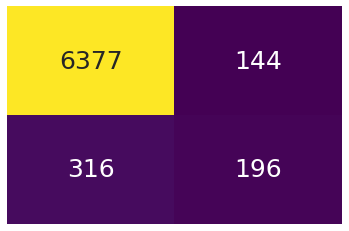

In [53]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True, annot_kws={"size": 25}, fmt="d", xticklabels=False, yticklabels=False, cmap="viridis", cbar=False)

In [54]:
accuracy_score(y_pred, y_test)

0.9345940565903598

In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6693
           1       0.38      0.58      0.46       340

    accuracy                           0.93      7033
   macro avg       0.68      0.76      0.71      7033
weighted avg       0.95      0.93      0.94      7033

